In [2]:
from google.colab import files
uploaded = files.upload()

Saving Dataset (1).csv to Dataset (1) (1).csv


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import folium
from folium.plugins import MarkerCluster


In [6]:
df = pd.read_csv('Dataset (1).csv', encoding='UTF-8-SIG')

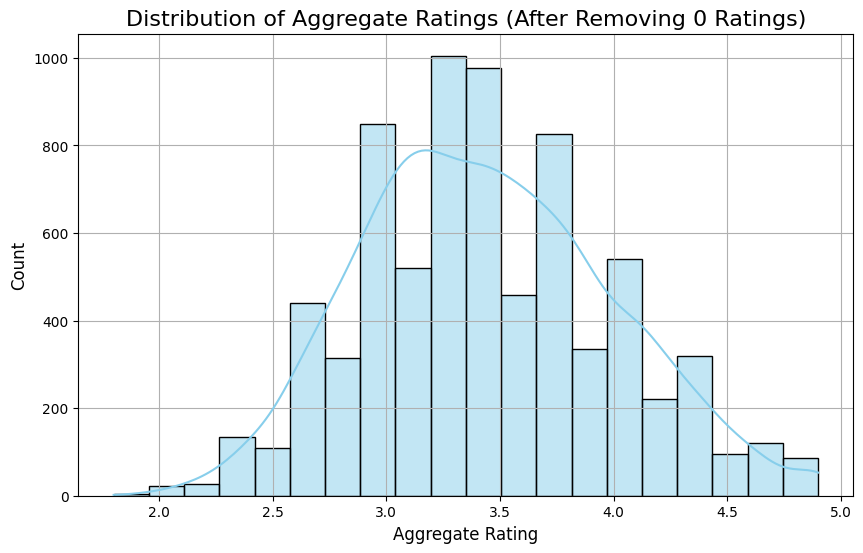

In [57]:
# Remove entries with a 0 rating
df_filtered = df[df['Aggregate rating'] > 0]

# Plot the distribution of aggregate ratings after filtering
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['Aggregate rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Aggregate Ratings (After Removing 0 Ratings)', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)
plt.show()


In [17]:
# Remove entries with a 0 rating
df_filtered = df[df['Aggregate rating'] > 0]

# Calculate the most common rating range after removing 0 ratings
rating_range = df_filtered['Aggregate rating'].value_counts().idxmax()

print(f"Most common rating range (after removing 0 ratings): {rating_range}")


Most common rating range (after removing 0 ratings): 3.2


In [21]:
# Calculate the average number of votes
avg_votes = df['Votes'].mean()
print(f"Average number of votes: {avg_votes:.2f}")

Average number of votes: 156.91


In [43]:
# Identify the most common combinations of cuisines
cuisine_combinations = df['Cuisines'].value_counts().head(10)
print("\
Top 10 cuisine combinations:")
print(cuisine_combinations)

Top 10 cuisine combinations:
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


In [44]:
# Determine if certain cuisine combinations tend to have higher ratings
top_cuisines = cuisine_combinations.index[:5]
cuisine_ratings = df[df['Cuisines'].isin(top_cuisines)].groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print("\
Average ratings for top 5 cuisine combinations:")
print(cuisine_ratings)

Average ratings for top 5 cuisine combinations:
Cuisines
North Indian, Mughlai    2.888623
North Indian, Chinese    2.421722
Fast Food                2.118362
Chinese                  2.042090
North Indian             1.672329
Name: Aggregate rating, dtype: float64


In [45]:
# Plot the locations of restaurants on a map
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)
marker_cluster = MarkerCluster().add_to(m)

for idx, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Restaurant Name']} - Rating: {row['Aggregate rating']}",
        tooltip=row['Restaurant Name']
    ).add_to(marker_cluster)

m.save('restaurant_map.html')
print("\
Map saved as 'restaurant_map.html'")

from google.colab import files

# Download the HTML file
files.download('restaurant_map.html')

Map saved as 'restaurant_map.html'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
# Identify restaurant chains
restaurant_counts = df['Restaurant Name'].value_counts()
chains = restaurant_counts[restaurant_counts > 1]
print(f"\
Number of restaurant chains: {len(chains)}")
print("\
Top 10 restaurant chains:")
print(chains.head(10))

Number of restaurant chains: 734
Top 10 restaurant chains:
Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64


In [47]:
# Analyze ratings and popularity of restaurant chains
chain_analysis = df_filtered[df_filtered['Restaurant Name'].isin(chains.index)].groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',
    'Votes': 'mean'
}).sort_values('Votes', ascending=False).head(10)

# Round the Aggregate Rating to 2 decimal places and convert Votes to integers
chain_analysis['Aggregate rating'] = chain_analysis['Aggregate rating'].round(2)
chain_analysis['Votes'] = chain_analysis['Votes'].astype(int)

# Print the result
print("Top 10 restaurant chains by popularity (average votes):")
print(chain_analysis)

Top 10 restaurant chains by popularity (average votes):
                           Aggregate rating  Votes
Restaurant Name                                   
Truffles                               3.95   4841
Joey's Pizza                           4.25   3903
AB's - Absolute Barbecues              4.82   3350
Big Chill                              4.47   2713
Big Yellow Door                        4.27   2503
Out Of The Box                         3.85   2450
Saravana Bhavan                        4.13   2412
Olive Bistro                           4.15   1854
Talaga Sampireun                       4.90   1838
SpiceKlub                              4.30   1825


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
# Analyze text reviews
if 'Review' in df.columns:
    # Combine all reviews
    all_reviews = ' '.join(df['Review'].dropna())

    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(all_reviews.lower())
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]

    # Get most common words
    word_freq = Counter(filtered_words)
    common_words = word_freq.most_common(10)

    # Plot most common words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words])
    plt.title('Most Common Words in Reviews')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Calculate average review length and explore relationship with rating
if 'Review' in df.columns:
    df['Review_Length'] = df['Review'].str.len()
    avg_review_length = df['Review_Length'].mean()
    print(f"Average review length: {avg_review_length:.2f} characters")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Review_Length', y='Aggregate rating', data=df)
    plt.title('Review Length vs. Rating')
    plt.xlabel('Review Length')
    plt.ylabel('Rating')
    plt.show()

# Remove restaurants with zero votes
df = df[df['Votes'] > 0]

# Identify restaurants with highest and lowest number of votes
top_votes = df.nlargest(5, 'Votes')[['Restaurant Name', 'Votes']]
bottom_votes = df.nsmallest(5, 'Votes')[['Restaurant Name', 'Votes']]

print("Top 5 restaurants by votes:")
print(top_votes)
print("\
Bottom 5 restaurants by votes (excluding zero votes):")
print(bottom_votes)



Top 5 restaurants by votes:
                Restaurant Name  Votes
728                        Toit  10934
735                    Truffles   9667
3994           Hauz Khas Social   7931
2412                  Peter Cat   7574
739   AB's - Absolute Barbecues   6907
Bottom 5 restaurants by votes (excluding zero votes):
           Restaurant Name  Votes
58   Quiosque Chopp Brahma      1
412             Nosh Mahal      1
871  Aggarwal Sweet Corner      1
878            Aapki Rasoi      1
888         Popcorn Fusion      1


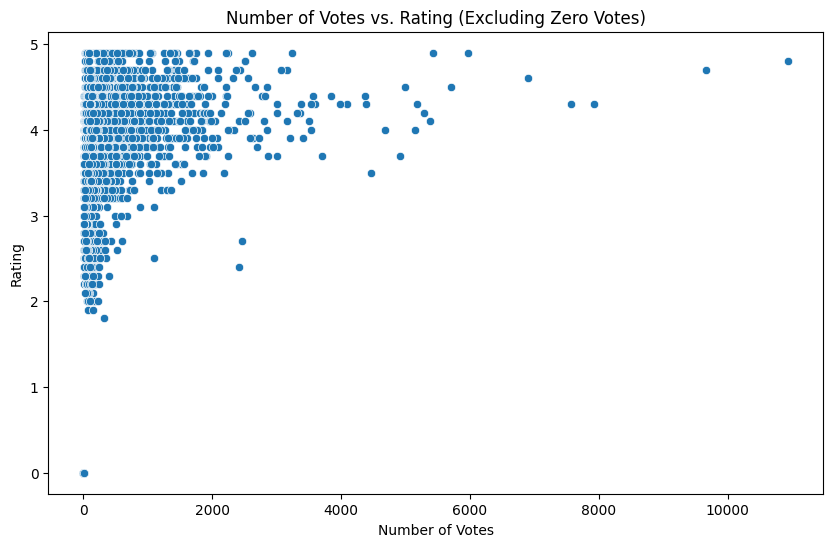

Correlation between votes and rating: 0.30


In [72]:
# Analyze correlation between number of votes and rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df)
plt.title('Number of Votes vs. Rating (Excluding Zero Votes)')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.show()
correlation = df['Votes'].corr(df['Aggregate rating'])
print(f"\
Correlation between votes and rating: {correlation:.2f}")


In [76]:
# Analyze relationship between price range and services
services_by_price = df.groupby('Price range').agg({
    'Has Table booking': lambda x: (x == 'Yes').mean(),  # Calculate the proportion of 'Yes'
    'Has Online delivery': lambda x: (x == 'Yes').mean()  # Calculate the proportion of 'Yes'
}).reset_index()

# Format the values as percentages
services_by_price['Has Table booking'] = (services_by_price['Has Table booking'] * 100).round(2)
services_by_price['Has Online delivery'] = (services_by_price['Has Online delivery'] * 100).round(2)

# Rename the columns for better readability
services_by_price.columns = ['Price Range', 'Table Booking (%)', 'Online Delivery (%)']

# Print the table
print("Services availability by price range:")
print(services_by_price)


Services availability by price range:
   Price Range  Table Booking (%)  Online Delivery (%)
0            1               0.03                19.37
1            2               7.82                43.53
2            3              45.59                29.46
3            4              46.47                 9.12


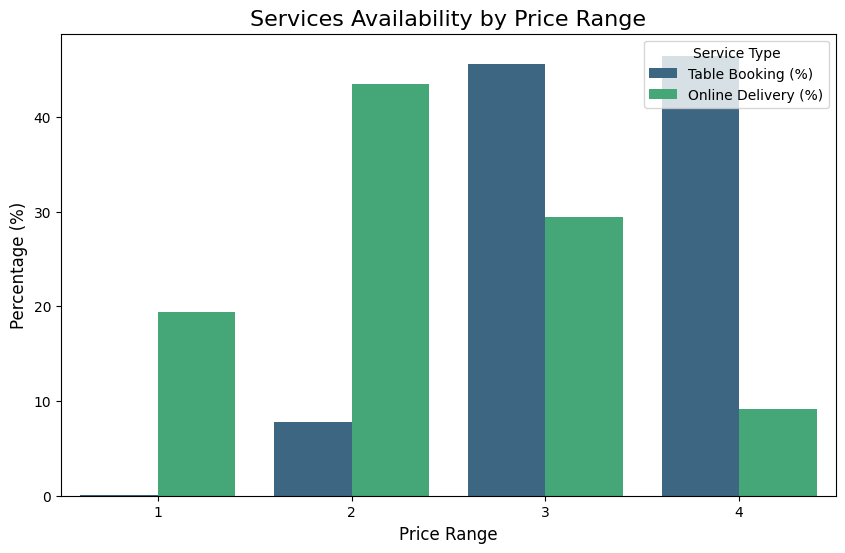

In [79]:
# Visualize relationship between price range and services

# Melt the dataframe for easier plotting
services_melted = services_by_price.melt(id_vars='Price Range',
                                         value_vars=['Table Booking (%)', 'Online Delivery (%)'],
                                         var_name='Service Type', value_name='Percentage')

# Create a grouped barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Price Range', y='Percentage', hue='Service Type', data=services_melted, palette='viridis')

# Add title and labels
plt.title('Services Availability by Price Range', fontsize=16)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Service Type', loc='upper right')

# Display the plot
plt.show()